# Crime in Vancouver EDA
### By: William Zhu, Daniel Luo, Alex Trudel, Jiancong Qi


#### Introduction

The data presented in this report details crime in the city of Vancouver. Vancouver is a city located in the province of British Columbia in Canada and became an incorporated city in 1886. In 2017, the city of Vancouver hosted a population of 675,000 people and had a wide range of demographics throughout the city’s diverse neighborhoods. Through exploratory data analysis of the dataset, we aim to present insights into Vancouver crime by looking at:
- Total crime throughout the years
- Trends in specific types of crime 
- Crime trends by neighborhoods

#### Background information on the city


The Greater Metro Vancouver area is a regional district in the province of British Columbia and is comprised of many municipalities and communities within the Canadian Lower Mainland. The regional district’s most populous city is the city of Vancouver and is the main region of focus within the Crime in Vancouver dataset. The city of Vancouver contains 23 neighborhoods that can be observed in the map below and contain a mix of various socio-economic and ethinic backgrounds. 

<img src='vancouvermap.png' alt="Drawing" style="width: 400px;"/>

The general trends of socio-economic demographics see more wealth being concentrated in neighborhoods in the west of Vancouver and the central business districts of the West End and Downtown. Neighborhoods in the east and south-east of the Vancouver region generally see lower income per household and property values than those in the west side of the city. Vancouver also has several neighborhoods with distinct ethnic mixes. Those of English, Irish and Scottish origins were historically the largest ethnic group in Vancouver, and this is still visible in areas like Kerrisdale and South Granville. Germans are the second-largest European group, followed by the Chinese, who are the largest visible ethnic group.

Vancouver is not recognized as a city with frequent crime but one notable incident of crime is the 2011 Vancouver Stanley Cup riots: a large public disturbance in the Downtown neighborhood following the loss of the city’s hometown hockey team, the Vancouver Canucks, in the NHL playoffs against the Boston Bruins. The incident lead to 887 charges against 301 individuals and included charges such as mischief, theft and violent assault. This incident is present in the proposed dataset and provides meaningful context for potential outliers and strange relationships found during analysis. 

#### Summary of the Dataset and Variables

The data is collected by the Vancouver Police Department and is sourced from their police databases. The dataset contains 530,652 observations of 12 variables. These variables are: 

    TYPE 
    YEAR
    MONTH
    DAY
    HOUR
    MINUTE
    HUNDRED_BLOCK
    NEIGHBOURHOOD
    X
    Y
    Latititude
    Longitude

The variable "TYPE" is a categorical variable that contains the type of crime committed in each observation and has no missing values. The possible values of this variable or the types of crimes recorded in the dataset are:

    Break and Enter Commercial                          
    Break and Enter Residential/Other                     
    Homicide                                            
    Mischief                                              
    Offence Against a Person                              
    Other Theft                                           
    Theft from Vehicle                                    
    Theft of Bicycle                                      
    Theft of Vehicle                                      
    Vehicle Collision or Pedestrian Struck (with Fatality)
    Vehicle Collision or Pedestrian Struck (with Injury)  

The other variables in the dataset can be classified as time variables and geographic variables. 

The variables YEAR, MONTH, DAY, HOUR, and MINUTE describe when the crime ocurred

The variables HUNDRED_BLOCK, NEIGHBOURHOOD, X, Y, Latitude, and Longitutde describe where the crime occured.  

From the time variables, each variable in this group measures the unit of time from minute to year during which the reported activity was committed. In this group, the variables Hour and Minute have a total of 54,362 missing values represented by N/A for all violent crimes in the variable "TYPE" for Homicide and Offense Against a Person. These values were intentionally omitted by the police department in order to protect the privacy of the involved indivduals in the crime. 

Amongst the geographic variables, some of these variables are more specific so we will provide clarification on each variable. 

- The variable "HUNDRED_BLOCK" represents a generalized location of the reported crime as a string formatted with all address numbers past the hundreth visible along with the street name included. 

- The variable "NEIGHBOURHOOD" is a categorical variable with 24 possible values that include each of the 23 neighbourhoods in the city of Vancouver and details in which neighbourhood the reported crime was committed. 

- The variables "X" and "Y" are coordinate values projected in the UTM Zone 10 of where the reported crime was comitted and the variables "Longitude" and "Latitude" are the values of variables "X" and "Y" respectively converted to longitude and latitude. 

For all of the geographic variables, all observations of violent crimes in the variable "TYPE" for Homicide and Offense Against a Person are labelled with a value that represents ommitted information.
- In the variable "HUNDRED_BLOCK", these observations contain a string "OFFSET TO PROTECT PRIVACY". 
- In the variable "NEIGHBOURHOOD", these observations have a value of "", and in variables "X", "Y", "Longitude", "Latitude", these observations have values 0. 

Again, these values were intentionally omitted by the police department in order to protect the privacy of the involved indivduals in the crime but unlike the "MINUTES" and "HOURS" variables, these values represent no information but aren't considered missing.

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
data = pd.read_csv('/Users/danielluo/Downloads/crime-in-vancouver/crime.csv')


- Dropping these columns as we won't be using them in our analysis

In [3]:
data.drop(['MINUTE', 'HUNDRED_BLOCK', 'X','Y'], axis = 1, inplace = True)
data['NEIGHBOURHOOD'].fillna('N/A', inplace=True)

- Creating a DATE variable and using it as the index

In [4]:
data['DATE'] = pd.to_datetime({'year': data['YEAR'], 'month': data['MONTH'], 'day': data['DAY']})
data = data.sort_values(['DATE'])
data['Day of Week'] = data['DATE'].dt.dayofweek + 1
data.index = pd.DatetimeIndex(data['DATE'])
data.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,DATE,Day of Week
DATE,,,,,,,,,,
2003-01-01,Offence Against a Person,2003,1,1,NaN,N/A,0.000000,0.000000,2003-01-01,3
2003-01-01,Offence Against a Person,2003,1,1,NaN,N/A,0.000000,0.000000,2003-01-01,3
2003-01-01,Mischief,2003,1,1,18.0,Central Business District,49.283857,-123.106363,2003-01-01,3
2003-01-01,Other Theft,2003,1,1,18.0,Central Business District,49.281898,-123.120738,2003-01-01,3
2003-01-01,Theft of Vehicle,2003,1,1,23.0,Kensington-Cedar Cottage,49.237564,-123.071217,2003-01-01,3
2003-01-01,Theft from Vehicle,2003,1,1,19.0,Grandview-Woodland,49.263683,-123.069706,2003-01-01,3
2003-01-01,Theft from Vehicle,2003,1,1,21.0,Central Business District,49.279159,-123.113100,2003-01-01,3
2003-01-01,Theft of Vehicle,2003,1,1,5.0,Central Business District,49.276548,-123.119005,2003-01-01,3
2003-01-01,Break and Enter Commercial,2003,1,1,12.0,Renfrew-Collingwood,49.258843,-123.031937,2003-01-01,3


- Since the dataset doesn't contain the full month of 2017-07 we're going to get rid of all observations past this point
- We're extracting the last 5 rows to make sure that there are no more dates with 2017-07
- We can also drop the DATE column after this because it's redundant

In [5]:
data = data[data.DATE < '2017-07-01']
data.drop(['DATE'], axis = 1, inplace = True)
data.iloc[-5:]

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude,Day of Week
DATE,,,,,,,,,
2017-06-30,Theft from Vehicle,2017,6,30,21.0,South Cambie,49.253500,-123.123261,5
2017-06-30,Mischief,2017,6,30,19.0,West Point Grey,49.271403,-123.211865,5
2017-06-30,Break and Enter Commercial,2017,6,30,15.0,Fairview,49.266190,-123.141418,5
2017-06-30,Theft of Bicycle,2017,6,30,17.0,Kitsilano,49.266525,-123.157181,5
2017-06-30,Other Theft,2017,6,30,21.0,Renfrew-Collingwood,49.258164,-123.036950,5


- Let's also add in a column "CATEGORY" to categorize the types of crime to make the plots looking for general trends a little more clear.

In [6]:
def category(crime_type):
    if 'Theft' in crime_type:
        return 'Theft'
    elif 'Break' in crime_type:
        return 'Break and Enter'
    elif 'Collision' in crime_type:
        return 'Vehicle Collision'
    else:
        return 'Others'
    
data['CATEGORY'] = data['TYPE'].apply(category)

- Now our dataset is fully prepared and ready for analysis 
- The missing values we see are from violent crimes and since they lack so much data, we won't be using them in our more in depth analyses for neighbourhoods and time but we still want to keep them for analyses with total crime

## All Crime Throughout The Years

To get a general sense of the trend of total crime throughout the years, we made a stacked barplot to show the changes in total crime as well the category of crime from 2003 to 2016. 

We excluded 2017 as the full year isn't recorded in the data.

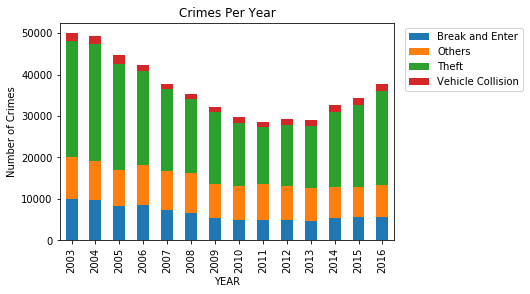

In [7]:
select = data.loc['2003-01-01':'2016-12-31',:]
crime_type_by_year = select.groupby(["CATEGORY", "YEAR"]).count()['MONTH']
crime_type_by_year_df = crime_type_by_year.unstack("CATEGORY")

crime_type_by_year_df.plot(kind='bar', stacked=True).legend(loc='upper right', bbox_to_anchor=(1.4,1))
plt.title("Crimes Per Year")
plt.ylabel("Number of Crimes");

- From the graph we can see that total crime gradually decreased from 2003 to 2012/2013, then increased slightly in more recent years
- The most common type of crime seems to be theft crimes and the least common crimes involve vehicle collisions
- It also seems that the trend of theft seems to be the crime type that affects the trend of total crime the most

Let's also look at the mean crime per day of the year from 2003 to 2017 to see if there are any days are that are especially high in crime. 

To do this we're going to use a Seaborn Heatmap where cells with darker blue signify days with higher than average crime and cells with light yellow/green signify days with lower than average crime.

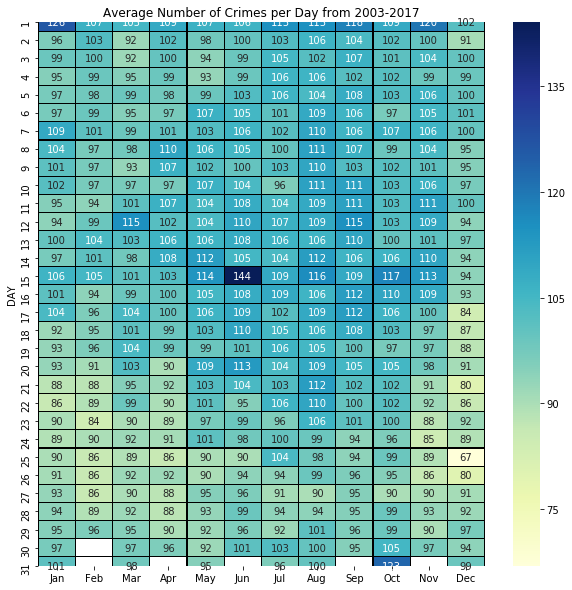

In [8]:
crimes_pivot_table = data.pivot_table(values='YEAR',index= 'DAY', columns='MONTH', aggfunc= len)

crimes_pivot_table_year_count = data.pivot_table(values='YEAR',index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))

crimes_average = round(crimes_pivot_table/crimes_pivot_table_year_count)
crimes_average.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


plt.figure(figsize = (10,10))
sns.heatmap(crimes_average, cmap= "YlGnBu", linecolor='black',linewidths=0.1,annot = True, fmt=".0f")
plt.title('Average Number of Crimes per Day from 2003-2017');

- It seems like criminals are less active in the later parts of each month -- maybe rent is due at the beginning? 
- Christmas is by far the day with the least arrests, either because no one is committing crimes, or because no one is out there to arrest them
- New Year's Day is the day with consistently the most arrests. This makes sense because celebrations with alcohol could lead to bad behavior
- The days surrounding Halloween have higher crime rate due to alcohol related crime and the wide-use of illegal fireworks during this time
- June 15 is a big outlier due to the Stanley Cup Riots that happened on this day in 2011

## Types of Crime throughout the Years

In order to gain insights from the data as well as the outliers that we know are present based off the Heatmap above, lets look at the types of crime throughout the years. 

From our stacked barplot of total crimes per year, we can see that the categories of Theft, Break and Enter, and Other are the most significant. Let's look more in depth at these variables.

### Theft Crimes

In this category we have:
- Theft of Vehicle
- Theft of Bicycle
- Theft from Vehicle 
- Other Theft

Let's begin by plotting the total crimes per month for these categories over the years to observe overall trends and patterns for each type of theft.

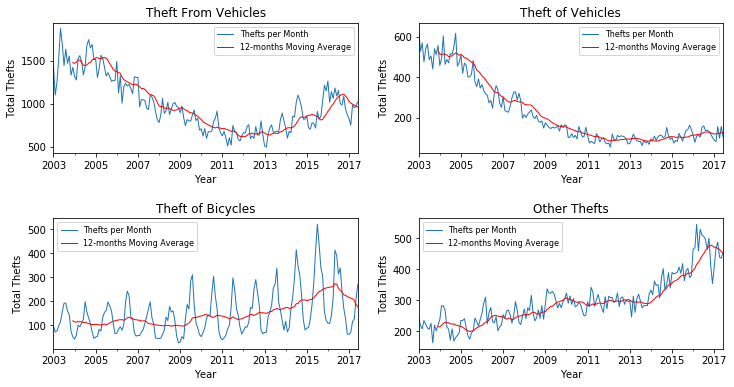

In [9]:
plt.subplot(2,2,1)
data[data['TYPE'] == 'Theft from Vehicle'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Theft from Vehicle'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Theft From Vehicles")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplot(2,2,2)
data[data['TYPE'] == 'Theft of Vehicle'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Theft of Vehicle'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Theft of Vehicles")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplot(2,2,3)
data[data['TYPE'] == 'Theft of Bicycle'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Theft of Bicycle'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Theft of Bicycles")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplot(2,2,4)
data[data['TYPE'] == 'Other Theft'].resample('M').count().TYPE.plot(figsize=(12,6), linewidth=1,label='Thefts per Month')
data[data['TYPE'] == 'Other Theft'].resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=1, label='12-months Moving Average')
plt.title("Other Thefts")
plt.ylabel("Total Thefts")
plt.xlabel("Year")
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

- From these graphs we can see that there's been a very strong decline in Vehicle Theft over the years.
    - From a little bit of research, we found that the Vancouver Police department implemented the Bait Car program specifically to target vehicle theft and the graph above shows that the program was very successful.
- Theft from Vehicles seems to be the most common type of theft and also ressembles the trend found in Total Crimes per Year barplot.
- Other Theft seems to increasing more rapidly in the most recent years.
- Theft of Bicycles has a very interesting trend as it seems to imply seasonality in the thefts.
    - Let's take a closer look at this specific type of theft.

Text(0.5, 1.0, 'Total Bike Theft Arrests by Month')

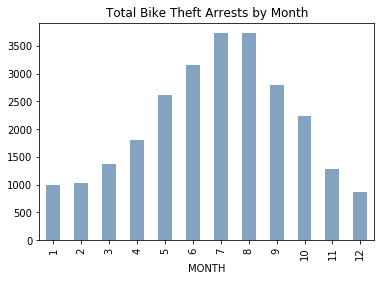

In [10]:
bt = data[data.TYPE == "Theft of Bicycle"]
bty = bt.groupby(["MONTH", "YEAR"]).count()['TYPE']
bty.unstack().sum(axis=1).plot(kind='bar',color=(0.2, 0.4, 0.6, 0.6))
plt.title("Total Bike Theft Arrests by Month")

- From this graph we can see that bike thefts are a seasonal crime: less common in the winter seasons and more common in the summer seasons. 

- This is probably due to the presence of snow and ice in the winter months, preventing people from using their bikes as well as a spike in bike use during the summer due to better conditions and increased tourism.

For the "Break and Enter" and "Other" categories of crime, we saw that these specific categories didn't change much over the years, so instead of looking at trends over time, let's look at specific outliers in these categories.

### Other Crimes

This category includes:
- Mischief
- Offense Against a Person
- Homicide

In [11]:
print(data[data['CATEGORY'] == 'Others']['TYPE'].value_counts())

Mischief                    70253
Offence Against a Person    54035
Homicide                      219
Name: TYPE, dtype: int64


Since data on Homicide is so limited, we should just focus on Michief and Offense crimes as they'll provide more meaningful results.

#### Mischief

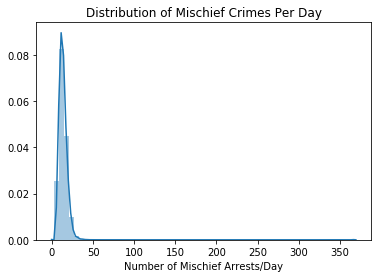

In [12]:
mischief_days = data[data['TYPE'] == 'Mischief'].resample('D').count().TYPE
sns.distplot(mischief_days, bins = 60)
plt.title("Distribution of Mischief Crimes Per Day")
plt.xlabel("Number of Mischief Arrests/Day");

In [13]:
mischief_days.mean()

13.267799811142588

- This data seems to be approximately normally distributed, with a mean of about 13 crimes per day.
- However there are definitely some outliers so let's look closer

In [14]:
print(mischief_days[(np.abs(stats.zscore(mischief_days) > 5))])

DATE
2008-03-12    120
2011-06-15    367
Name: TYPE, dtype: int64


- It looks like there are 2 days with a massive amount of Mischief crimes, one that we already know belongs to the Stanley Cup riots.
- Let's compare these days to the rest of their weeks to see if they were an explosion of unrest, or just anomalies

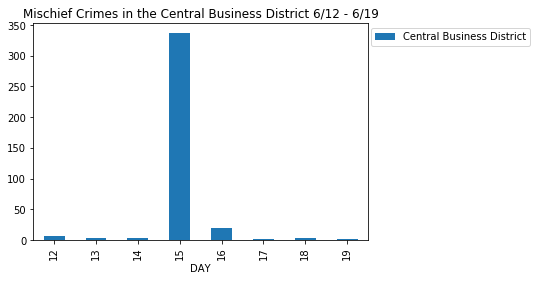

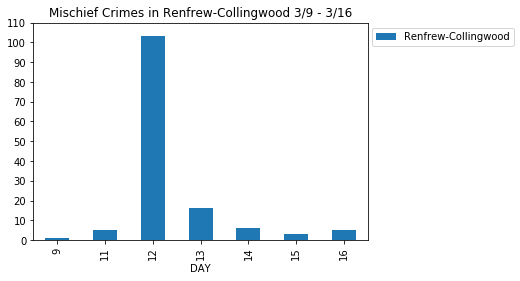

In [15]:
cbd = data[data['YEAR'] == 2011]
cbd1 = cbd[cbd['NEIGHBOURHOOD'] == 'Central Business District']
cbd2 = cbd1[cbd1['MONTH'] == 6]
cbd3 = cbd2[cbd2['DAY'].isin([12,13,14,15,16,17,18,19])]
cbd4 = cbd3[cbd3['TYPE'] == 'Mischief']
mischief_cbd_in_range = cbd4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_cbd_in_range.unstack().plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in the Central Business District 6/12 - 6/19");

rc = data[data['YEAR'] == 2008]
rc1 = rc[rc['NEIGHBOURHOOD'] == 'Renfrew-Collingwood']
rc2 = rc1[rc1['MONTH'] == 3]
rc3 = rc2[rc2['DAY'].isin([9,10,11,12,13,14,15,16])]
rc4 = rc3[rc3['TYPE'] == 'Mischief']
mischief_rc_in_range = rc4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_rc_in_range.unstack().plot(kind='bar') 
plt.legend(loc='upper right', bbox_to_anchor=(1.45,1))
plt.title("Mischief Crimes in Renfrew-Collingwood 3/9 - 3/16");
plt.yticks(np.arange(0,120, step=10));

- It looks like the days where there were lots of Mischief crimes generally came out of nowhere but the elevated rates of Mischief tended to stick around for a day or 2 after, reflecting either heightened policing or tension still in the area.


- While the spike in Mischief crimes in the Central Business District can be easily explained by the Stanley Cup Riots, we couldn't find a single mention of the 100+ mischief arrests in Renfrew-Collingwood on March 12th, 2008. Since there was an elevated number of Mischief crimes the following day, we don't believe that the 100+ outlier was a reporting error by the Vancouver Police.


- Renfrew-Collingwood is a lower-income neighborhood, and this activity did occur in 2008 before the market crash, so maybe this event was triggered by a mass layoff, or something like that. This is pure speculation, but it's weird that so many people were arrested and there's nothing mention of it on the internet at all. Maybe Vancouver PD is hiding something!

#### Offence Against A Person

The term “crimes against the person” refers to a broad array of criminal offenses which usually involve bodily harm, the threat of bodily harm, or other actions committed against the will of an individual. ... Additionally, offenses such as harassment, kidnapping, and stalking also are considered crimes against the person.

Let's start by looking at the distribution of this specific crime again.

Text(0.5, 0, 'Number of Offence Arrests/Day')

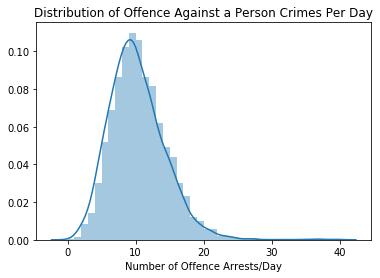

In [16]:
offence_days = data[data['TYPE'] == 'Offence Against a Person'].resample('D').count().TYPE
sns.distplot(offence_days, bins = 40)
plt.title("Distribution of Offence Against a Person Crimes Per Day")
plt.xlabel("Number of Offence Arrests/Day")

The distribution looks relatively normal with a slight right skew due to several days where it seems like people committed about quadruple the average number of Personal Offences. Let's see when they were and if we can make any conclusions off of them.

In [17]:
offence_days[np.abs(stats.zscore(offence_days) > 5)]

DATE
2004-01-01    40
2005-01-01    36
2006-01-01    39
2007-01-01    32
2008-01-01    39
2010-01-01    37
2011-01-01    37
2011-06-15    35
2012-01-01    31
2013-01-01    37
2014-01-01    34
Name: TYPE, dtype: int64

- Interestingly, all the significant outliers seem to be happening on New Years Day

Let's look more into this and look at the proportion of Offence crimes on New Years day compared to other days.

In [18]:
oaap1 = data[data['TYPE'] == 'Offence Against a Person']
oaap = oaap1[oaap1['DAY'] == 1]
oaap = oaap[oaap['MONTH'] == 1]
oaap_on_new_years = oaap.count()['TYPE']

print((1/365)*100)

oaap_ny_percentage = oaap_on_new_years/data[data['TYPE'] == 'Offence Against a Person'].count()['TYPE'] *100
print(oaap_ny_percentage)

0.273972602739726
0.8938650874433237


- So around 0.89% of all of Vancouver's Offences Against People occur on New Year's Day
- It's essentially almost 4 times more likely that you get arrested for Offence Against a Person on New Year's Day compared to the 0.27% chance on any other day of the year.

## Break and Enter Crimes

This category includes:
- Break and Enter Residential/Other
- Break and Enter Commercial

In [19]:
print(data[data['CATEGORY'] == 'Break and Enter']['TYPE'].value_counts())

Break and Enter Residential/Other    60768
Break and Enter Commercial           33787
Name: TYPE, dtype: int64


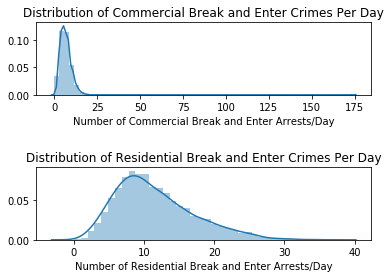

In [20]:
plt.subplot(2,1,1)
BE_commercial = data[data['TYPE'] == 'Break and Enter Commercial'].resample('D').count().TYPE
sns.distplot(BE_commercial, bins = 60)
plt.title("Distribution of Commercial Break and Enter Crimes Per Day")
plt.xlabel("Number of Commercial Break and Enter Arrests/Day")

plt.subplot(2,1,2)
BE_residential = data[data['TYPE'] == 'Break and Enter Residential/Other'].resample('D').count().TYPE
sns.distplot(BE_residential, bins = 38)
plt.title("Distribution of Residential Break and Enter Crimes Per Day")
plt.xlabel("Number of Residential Break and Enter Arrests/Day")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)

- It seems that Commerical Breaking and Entering was also heavily affected by the Stanley Cup Riots, as many rioting fans broke into and destroyed businesses downtown. 
    - Were there any other significant outlier days where people broke into commercial buildings or is the tail caused only by the day of the riot?
    
    

- The Residential Breaking and Entering distribution seems mostly normal with a slight right skew and a couple outlier days where 30 homes and more were broken into. Let's see when and where this occurred.

### Breaking and Entering Commerical

In [21]:
bcd = data[data.TYPE == 'Break and Enter Commercial'].groupby("DATE").count()['TYPE']
print(bcd[np.abs(stats.zscore(bcd) > 4)])

DATE
2004-09-16     24
2006-02-03     24
2011-06-15    174
Name: TYPE, dtype: int64


In [22]:
print(data.loc['2011-06-15'][data.loc['2011-06-15'].TYPE == 'Break and Enter Commercial'].NEIGHBOURHOOD.value_counts())


Central Business District    171
Victoria-Fraserview            1
Dunbar-Southlands              1
Fairview                       1
Name: NEIGHBOURHOOD, dtype: int64


- While there were two days with 24 Breaking and Entering (Commercial) crimes, neither are particularly close to the 174 people arrested for breaking and entering during the 2011 Stanley Cup Riots so I will be focusing on those. 


- Also, the majority of these Breaking and Entering arrests were made in the Central Business District as a direct result of the riots, so I will be focusing on that neighborhood.

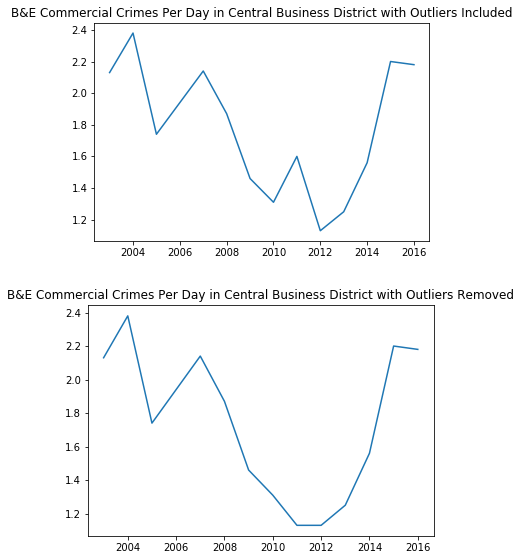

In [23]:
fig = plt.figure()

bec = select[select.TYPE == "Break and Enter Commercial"].groupby(['NEIGHBOURHOOD', 'YEAR', 'MONTH', 'DAY'])['TYPE']
break_comm_df = bec.count().unstack('NEIGHBOURHOOD').fillna(0)
bec_cbd_sum = break_comm_df.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

ax1=fig.add_subplot(111)
ax1.plot(bec_cbd_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2))
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Included")


bec_cbd_no_outliers =  break_comm_df[(np.abs(stats.zscore(break_comm_df['Central Business District'])) < 5)]
bec_cbd_no_outliers_sum = bec_cbd_no_outliers.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

ax2 = fig.add_axes([0.11, -.9, .8, .8])
ax2.plot(bec_cbd_no_outliers_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2))
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Removed");

- We can see that with the exclusion of the Stanley Cup Riots allows us to see that the trend is more of what we expected form the trends of total crime.


- We can also see that there is a significant reduction in break-ins from 2007-2012

### Break and Enter Residential

In [24]:
ber = data[data.TYPE == 'Break and Enter Residential/Other'].groupby("DATE").count()['TYPE']
print(ber[np.abs(stats.zscore(ber) > 4)])

DATE
2003-04-03    34
2003-04-26    34
2004-03-08    37
Name: TYPE, dtype: int64


- It seems like most of these crimes occurred in the Spring months of the early/mid 2000s, where Vancouver had more crime than it does now.

Let's check which neighborhoods the thieves hit most often:

In [25]:
print(data.loc["2003-04-03"][data.loc["2003-04-03"].TYPE == 'Break and Enter Residential/Other'].NEIGHBOURHOOD.value_counts().head(5))


Oakridge                     6
Dunbar-Southlands            3
Sunset                       3
Central Business District    3
Marpole                      3
Name: NEIGHBOURHOOD, dtype: int64


In [26]:
print(data.loc["2003-04-26"][data.loc["2003-04-26"].TYPE == 'Break and Enter Residential/Other'].NEIGHBOURHOOD.value_counts().head(5))


Hastings-Sunrise             9
Sunset                       5
Kitsilano                    5
Renfrew-Collingwood          3
Central Business District    2
Name: NEIGHBOURHOOD, dtype: int64


In [27]:
print(data.loc["2004-03-08"][data.loc["2004-03-08"].TYPE == 'Break and Enter Residential/Other'].NEIGHBOURHOOD.value_counts().head(5))


Mount Pleasant        4
Fairview              4
Grandview-Woodland    4
Sunset                4
Riley Park            3
Name: NEIGHBOURHOOD, dtype: int64


- Interestingly enough, there doesn't seem to be a specific neighborhood targeted for mulitple major attacks

## Analyzing Crime by Neighborhoods

In this portion we're going to look at the trends between specific neighborhoods and crime rates. I'll also be incorporating data about neighborhood population and area from the Vancouver public census website. See here https://vancouver.ca/news-calendar/areas-of-the-city.aspx for specifics.



### Neighborhoods by Crime Proportion

Let's start with a breakdown of the types of crimes that occur in each neighbourhood.

In [28]:
data['counter'] = 1
neighborhood_crime = pd.pivot_table(data, values = 'counter', index = 'NEIGHBOURHOOD', columns = 'TYPE', aggfunc='count')
neighborhood_crime['All Crime Count'] = neighborhood_crime.sum(axis=1)
neighborhood_crime_percent = round(neighborhood_crime.iloc[:,:9].div(neighborhood_crime['All Crime Count'], axis = 0) * 100, 2)
neighborhood_crime_percent['All Crime Count'] = neighborhood_crime['All Crime Count']
neighborhood_crime_percent.sort_values('All Crime Count')[::-1]

TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,All Crime Count
NEIGHBOURHOOD,,,,,,,,,,
Central Business District,8.46,3.17,NaN,15.02,NaN,17.33,43.27,6.22,3.63,110609.0
N/A,0.01,0.01,0.39,0.45,95.61,0.01,3.20,0.19,0.12,56515.0
West End,6.71,8.43,NaN,12.88,NaN,14.57,40.88,7.20,6.45,41249.0
Fairview,10.27,11.93,NaN,9.94,NaN,10.14,37.13,10.54,6.34,32114.0
Mount Pleasant,9.07,10.74,NaN,13.31,NaN,12.12,31.69,8.98,8.70,30473.0
Grandview-Woodland,7.67,16.63,NaN,18.30,NaN,9.19,27.00,5.15,11.46,27122.0
Renfrew-Collingwood,4.48,16.07,NaN,14.54,NaN,15.38,31.43,1.55,11.25,26690.0
Kitsilano,7.85,16.47,NaN,13.84,NaN,6.47,33.35,9.18,8.89,26611.0
Kensington-Cedar Cottage,5.11,16.60,NaN,15.08,NaN,11.88,29.96,3.42,11.71,24890.0


To read this example, we can see that 43% of all crimes that occur in the Central Business District are theft from vehicles.

We see a few trends, one is that the most common type of crime in the Central Business District and West End is Theft from a Vehicle, meaning that these highly urban areas are likely areas with lots of cars too. This makes sense since big cities always have a ton cars parked on the street that are easily access for crime.


We can see that Shaughnessy, Arbutus Ridge, Oakridge, Kerrisdale have a high number of residential break-ins. This indicates to us that they're probably highly residential neighborhoods (and so the only crime that exists is residential break ins).

### Geographic View

Let's see if we can visualize some of where these crimes occur.

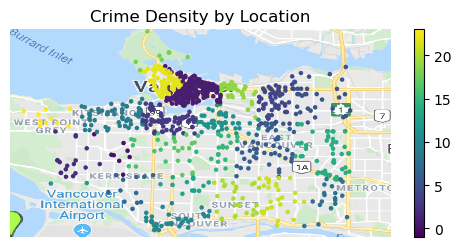

In [29]:
data = pd.read_csv('/Users/danielluo/Downloads/crime-in-vancouver/crime.csv')
data['counter'] = 1

cleaned = data[data.Longitude != 0]
cleaned = cleaned[cleaned.Longitude > -123.797726]
cleaned = cleaned[cleaned.Latitude > 49.118175]

cleaned.TYPE = cleaned.TYPE.astype('category').cat.codes
cleaned.NEIGHBOURHOOD = cleaned.NEIGHBOURHOOD.astype('category').cat.codes

from matplotlib.pyplot import figure
figure(num=None, figsize=(6.13,2.75), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/vancouverpic2.png', 0)
# crop to 723
img_cropped = img[:,:726,:]
plt.imshow(img_cropped, zorder=0, aspect = 'auto',extent=[-123.223955, -123, 49.20089685,49.31334872])
sample = cleaned.sample(1000)

plt.scatter(sample['Longitude'],sample['Latitude'], c = sample['NEIGHBOURHOOD'], s = 5)
plt.colorbar()
plt.title("Crime Density by Location")
plt.axis('off')
plt.show()

Note that each of dot represents a crime and this is a random sample of 1000 crimes.

From this, we can get a sense of the where the crime density lies in Vancouver. The highly dense yellow and dark purple areas represent the West End and the Central Business District. These are the most urban and densely populated areas in Vancouver so it makes sense that these are locations of high crime density.

But this doesn't really give us a good idea of how "dangerous" an area is, since these areas are also high population. Of course neighbourhoods with huge amounts of people experience more crime by count than neighbourhoods with fewer people, even though it doesn't indicate anything about overall safety.

In [30]:
# pre-processing and loading necessary data.
data['counter'] = 1
categories=['Theft', 'Break and Enter', 'Vehicle Collision', 'Others']    
neighbourhoods_alpha = pd.Series(pd.unique(data.NEIGHBOURHOOD)).sort_values().reset_index().iloc[:,1]

# categories
def categorize(crime):
    if 'Theft' in crime:
        return "Theft"
    elif 'Break' in crime:
        return 'Break and Enter'
    elif 'Collision' in crime:
        return 'Vehicle Collision'
    else:
        return 'Others'

categories=['Theft', 'Break and Enter', 'Vehicle Collision', 'Others']    

data['CATEGORY'] = data['TYPE'].apply(categorize)

# values taken from website
neighbourhood_areas = pd.Series([370,370,856,327,445,793,724,631,664,546,559,366,125,401,805,491,446,217,405,388,626,531,198,445,0])
neighbourhood_pops2016 = pd.Series([15295, 62030, 21425, 33620, 29175, 34575, 49325, 13975, 29325, 43045, 24460, 32955, 2300, 13030, 51530, 22555, 8430, 7970, 0, 12585, 36500, 31065, 47200, 13065, 0])

# create dataframes of neighbourhood w population and area
area_neighbourhood = pd.concat([neighbourhoods_alpha, neighbourhood_areas], axis=1, keys = ['NEIGHBOURHOOD', 'AREA']).set_index('NEIGHBOURHOOD')
area_neighbourhood
pop_neighbourhood = pd.concat([neighbourhoods_alpha, neighbourhood_pops2016], axis=1, keys = ['NEIGHBOURHOOD','POPULATION']).set_index('NEIGHBOURHOOD')
pop_neighbourhood

# create a list of crimes with known data
crimes = pd.unique(data.TYPE)
known_crimes = crimes[crimes != 'Homicide']
known_crimes = known_crimes[known_crimes != 'Offence Against a Person']

# neighbourhoods of interest
neighbourhoods_interest = ['Strathcona', 'West Point Grey', 'Mount Pleasant']
neighbourhoods_interestedin = data[data.NEIGHBOURHOOD.isin(neighbourhoods_interest)]

# functions to plot
def plot_density(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.CATEGORY == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(area_neighbourhood.AREA, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime per Density through the Years: " + str(crime_type))
    ax.set_ylabel("Crime Occurrences per Hectare")
    
    ax.get_legend().set_bbox_to_anchor((1, 1))
    
def plot_per_cap(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.CATEGORY == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(pop_neighbourhood.POPULATION, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime per Capita through the Years: " + str(crime_type))
    ax.set_ylabel("Crime Occurrences per Capita")
    ax.get_legend().set_bbox_to_anchor((1, 1))

Since there are a ton of different neighborhoods in Vancouver, we'll be focusing on three of them specifically. Based on their socio-economic uniqueness.

Strathcona - Represents a fairly low income residential neighborhood. We expect high crime in this area.

West Point Grey - High-income neighborhood. We expect fairly low crime in this area.

Mount Pleasant - Middle-class neighborhood. We expect moderate amounts of crime in this area.

We'll also be using crime per capita instead of count of crime. We believe this will help to normalize neighbourhoods with high population and give a better estimate for overall dangerousness.

### Crime per Capita per Year

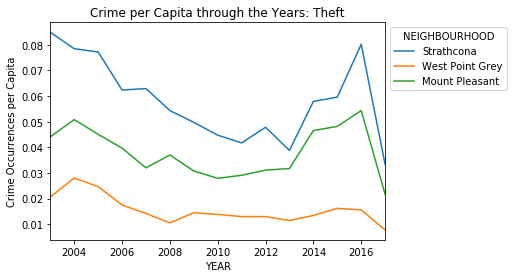

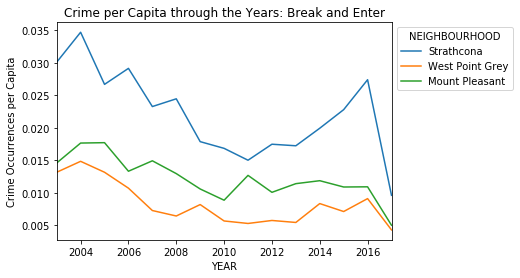

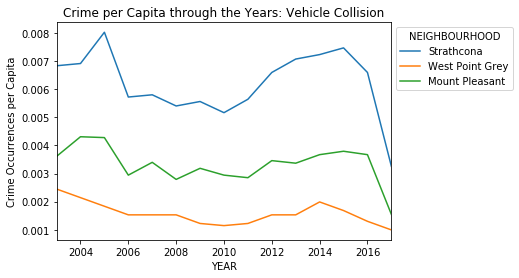

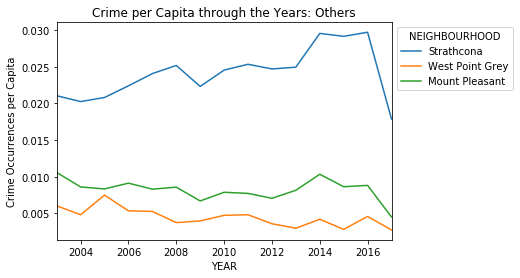

In [31]:
# do in subplots so its a grid of 4
for crime in categories:
    plot_per_cap(neighbourhoods_interestedin, crime, 'YEAR', neighbourhoods_interest)
    

We can clearly see the separation of crime per capita based on our expected socioeconomic condition of each neighbourhood. Strathcona, the lowest income neighbourhood, has the highest crime per capita for all four types of crime. Mt Pleasant, the middle class neighbourhood has the middle level of crime per capita and the rich area of West Point Grey has the lowest level of crime.

We can see that there is a clear relationship between socioeconomic state and crime rate. This won't be done in this report, but it would be interesting to see if we had data on average income and mapped out the relationship between average income and crime rate to solidify this relationship.

### Downtown Crime 

Pre-processing the data

In [32]:
dt = data.loc[data['NEIGHBOURHOOD'] == 'Central Business District', :]
dt['DATE'] = pd.to_datetime({'year': dt['YEAR'], 'month': dt['MONTH'], 'day': dt['DAY']})
dt = dt.sort_values(['DATE'])
dt.index = pd.DatetimeIndex(dt['DATE'])
dt = dt[dt.DATE < '2017-07-01']

/Users/danielluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


For the Dowtown Central Business District, let's look more in depth into crimes that would affect businesses.

To do this let's look at "Break and Enter Commerical", "Other Theft" as it would include shoplifting as well as business related theft and "Mischief" in terms of vandalism of property etc. 

Furthermore lets look at the hours in the day and the day of the week to see if there are any interesting trends.

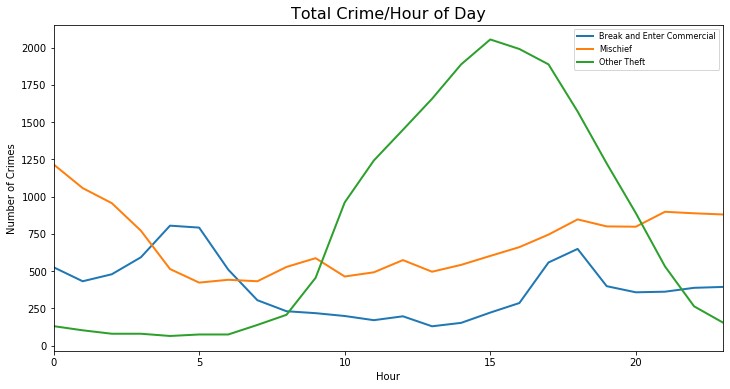

In [33]:
dt.groupby(['HOUR','TYPE'])['DATE'].count().unstack().loc[:,['Break and Enter Commercial', 'Mischief', 'Other Theft']].plot(figsize=(12,6), linewidth=2,label='Total per Year')
plt.title('Total Crime/Hour of Day', fontsize=16)
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

- From this graph, we can see that theft is the most common crime and occurs mostly around the time of 6 PM which is usually the closing time of most retail stores in the Downtown area


- Break and Enters are also more common than thefts in the early hours of the morning and also peak around closing time as well


- Mischief crimes seems to be at their highest around midnight.

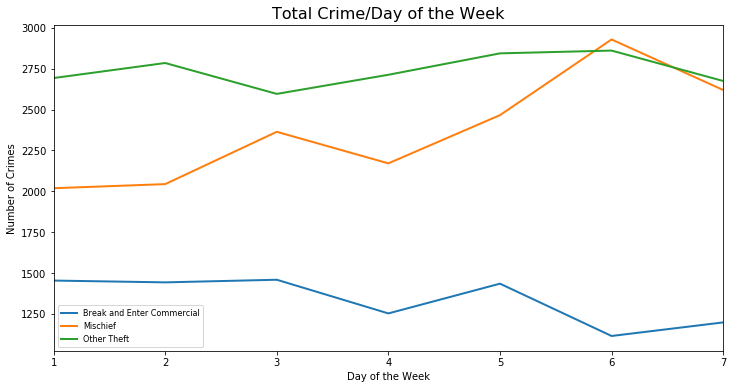

In [34]:
dt['Day of Week'] = dt['DATE'].dt.dayofweek + 1 
dt.groupby(['Day of Week','TYPE'])['DATE'].count().unstack().loc[:,['Break and Enter Commercial', 'Mischief', 'Other Theft']].plot(figsize=(12,6), linewidth=2,label='Total per Year')
plt.title('Total Crime/Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks()
plt.tick_params(labelsize=10)
plt.legend(prop={'size':8})

- From this graph we can see that mischief crimes get higher closer to the weekends


- Break and Enters seem to be higher during the weekdays


- Thefts stay pretty consistent throughout the week

## Modeling the Data

So far we've seen a lot of interesting trends with regard to crime in Vancouver especially relationships between time variables and crime rates. Let's see if we can build some models to cement these relationships.

### Crime per Hour

Below is a plot of the count of crimes for every hour of the day.

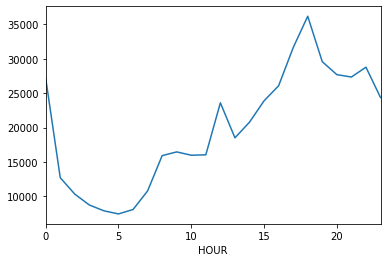

In [35]:
hourly_crime = data.groupby('HOUR').agg('count').iloc[:,0]
hourly_crime.plot()


We'll try to fit a model to this data, starting with a linear model.

In [36]:
hourly_crime = hourly_crime.reset_index()
hourly_crime.head(5)

,HOUR,TYPE
0,0.0,27177
1,1.0,12721
2,2.0,10337
3,3.0,8757
4,4.0,7912


0     27177
1     12721
2     10337
3      8757
4      7912
5      7462
6      8101
7     10802
8     15934
9     16476
10    15991
11    16055
12    23613
13    18523
14    20794
15    23896
16    26085
17    31621
18    36195
19    29590
20    27707
21    27361
22    28791
23    24389
Name: TYPE, dtype: int64


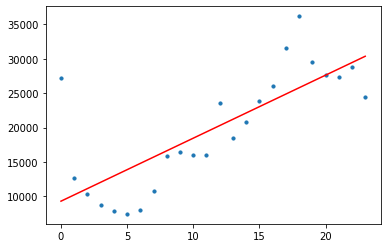

5464.82409122042

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x = hourly_crime.iloc[:,0]
y = hourly_crime.iloc[:,1]
print(y)
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse


As we can see this model doesn't fit super well. The root mean squared error is 5464 which is not very good. Visually we can see the fit is not great either. But that's okay. Let's try a polynomial regression, so we'll try to fit a cubic function. The reason why is that the function does kind of look cubic in the sense that is goes down and then goes up and then goes down again.

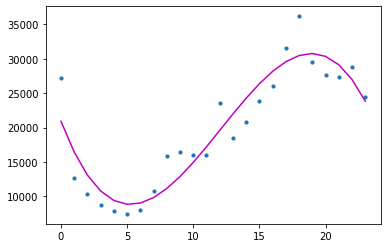

2969.555646231837

In [38]:
from sklearn.linear_model import LinearRegression
import operator
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
x = hourly_crime.iloc[:,0]
y = hourly_crime.iloc[:,1]

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
rmse


As we can see the fit is much better and the root mean square error is not 2959, around half of what it was before. So it has indeed improved!

In [39]:
data

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter,CATEGORY
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,1,Theft
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,1,Theft
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,1,Theft
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,1,Theft
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,1,Theft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595,1,Break and Enter
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129,1,Others
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000,1,Others
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031,1,Theft


### Time Series analysis with Facebook Prophet

Since there are a lot of interesting trends with time variables, we wanted to see if we could model some of them. One of the most periodic trends we noticed was the rate of crime for bike theft. Bike theft follows an ebb and flow because bike thefts decrease in the winter and increase in the summer. This makes it a perfect candidate to model with time series analysis.

We discovered Facebook created a package that model time series analysis much in the same way that sklearn can so we decided to try our hand at it.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


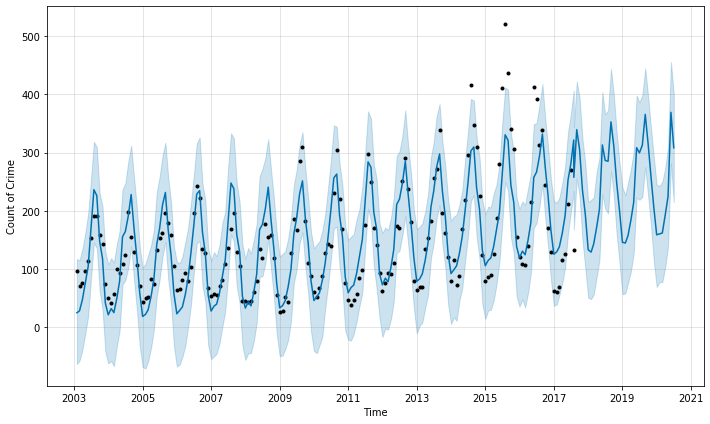

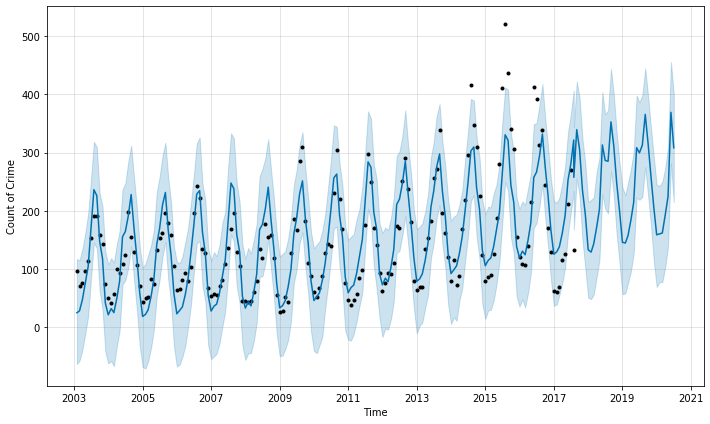

In [40]:
data['DATE'] = pd.to_datetime({'year': data['YEAR'], 'month': data['MONTH'], 'day': data['DAY']})
data.index.names = ['date']
data = data.sort_values(['DATE'])
data['Day of Week'] = data['DATE'].dt.dayofweek
data.index = pd.DatetimeIndex(data['DATE'])


bike_theft = data[data['TYPE'] == 'Theft of Bicycle'].resample('M').count().iloc[:,0]

bike_theft = bike_theft.reset_index()
bike_theft = bike_theft.rename(columns = {'DATE':'ds', 'TYPE':'y'})

bike_theft

from fbprophet import Prophet

bike_theft_model = Prophet(interval_width=0.95)
bike_theft_model.fit(bike_theft)
bike_theft_forecast = bike_theft_model.make_future_dataframe(periods=36, freq='MS')
bike_theft_forecast = bike_theft_model.predict(bike_theft_forecast)
bike_theft_model.plot(bike_theft_forecast, xlabel = 'Time', ylabel = 'Count of Crime')

In [41]:
rmse = np.sqrt(np.mean((bike_theft.y - bike_theft_forecast.yhat)**2))
rmse

44.58055418213621

### Compare Time Series Model to Linear Model

0           0
1          97
2         200
3         299
4         400
        ...  
170    140200
171    140299
172    140400
173    140499
174    140600
Name: ds, Length: 175, dtype: int64


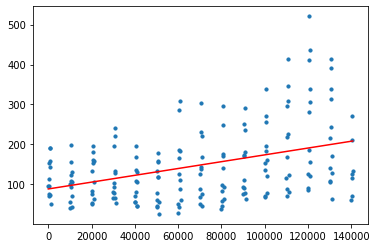

85.68682695630717

In [42]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

x = bike_theft.iloc[:,0].apply(to_integer) - min(bike_theft.iloc[:,0].apply(to_integer))
y = bike_theft.iloc[:,1]
print(x)
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse


Visually the time series model looks like it fits really well. It follows each of the rise and falls of the data and the root mean square of the model is 44.5. Compare this with the linear model which visually fits quite poorly and has a rmse of 85, which is much higher.